In [2]:
import pandas as pd

# Veriyi oku
housing = pd.read_csv('housing.csv')

# İlk 5 satıra bakalım
print(housing.head())

# Veri setinin genel yapısı (Hangi sütunda eksik veri var?)
print(housing.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

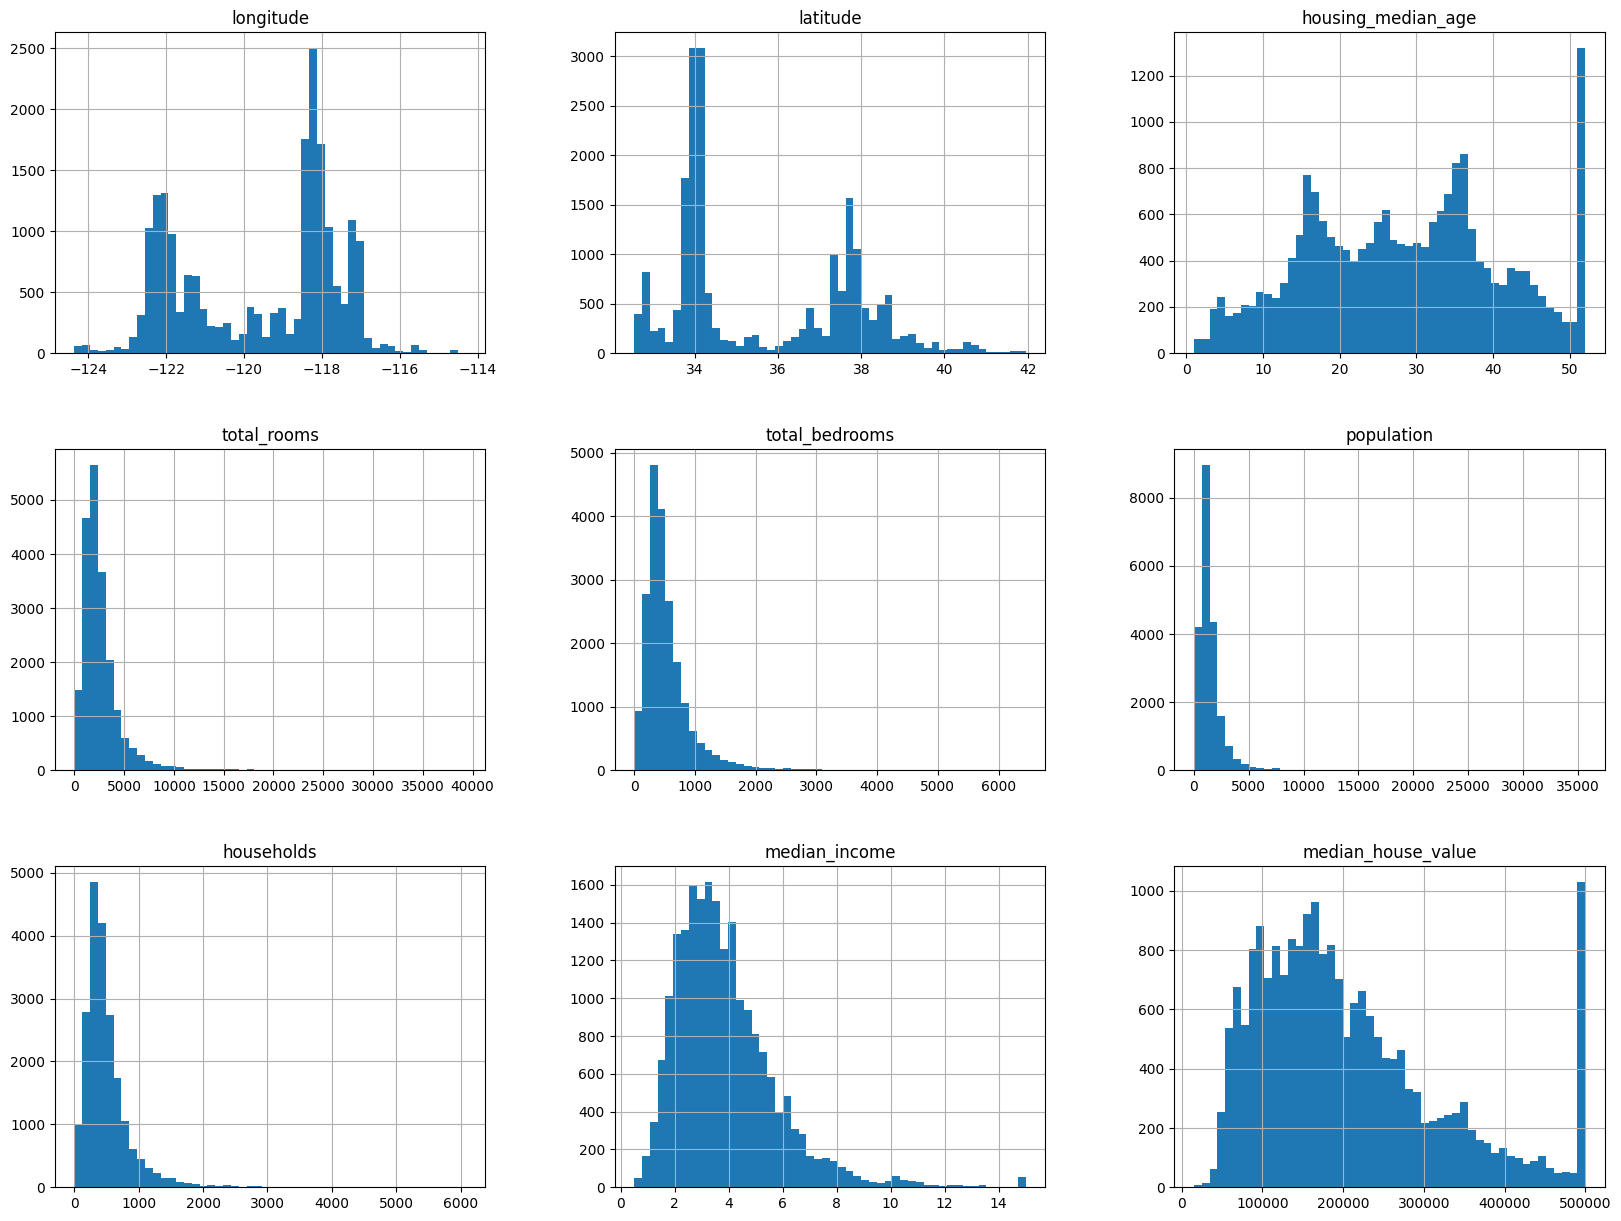


--- DATA DESCRIPTION ---
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.4999

In [5]:
import matplotlib.pyplot as plt

# 1. GÖRSEL KISIM: Histogramları çiz
# (Senin görmen için: Dağılımları, tepe noktalarını ve kuyrukları incele)
housing.hist(bins=50, figsize=(20,15))
plt.show()

# 2. TERMİNAL KISMI: İstatistiksel Özet
# (Bana atman için: Standart sapma, min, max ve çeyrekler)
print("\n--- DATA DESCRIPTION ---")
print(housing.describe())

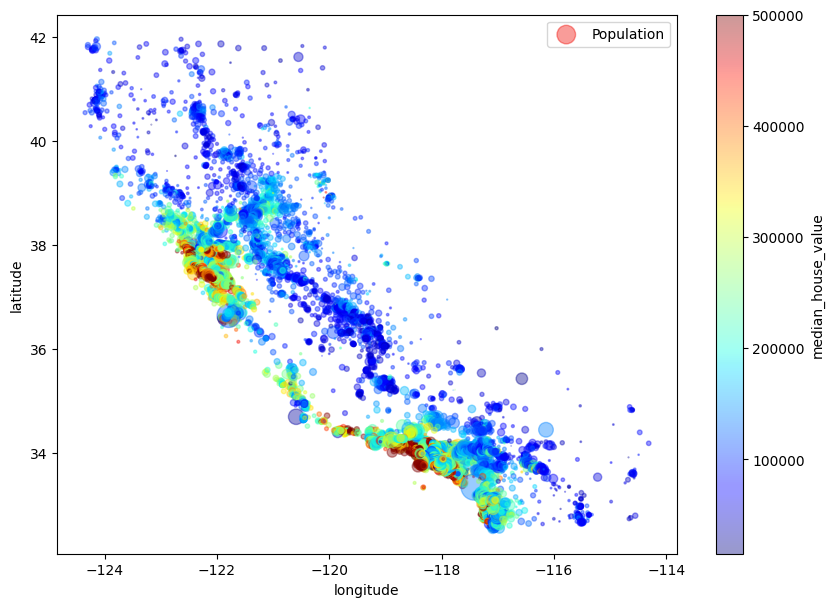

In [4]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="Population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()


--- CORRELATION WITH MEDIAN HOUSE VALUE ---
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


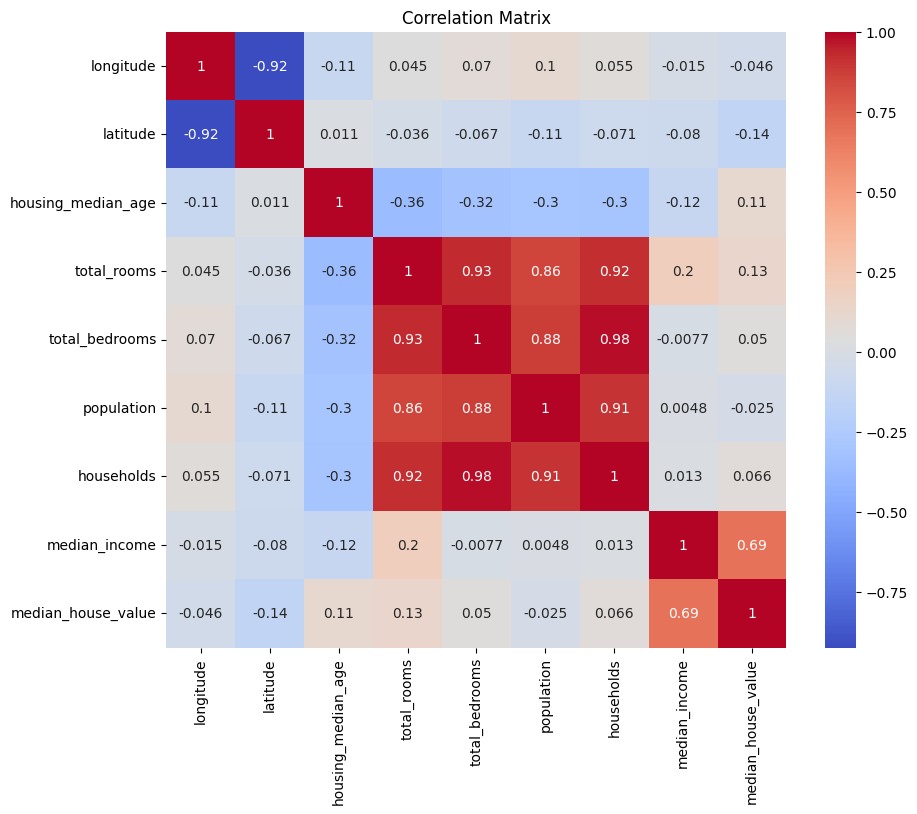

In [6]:
import seaborn as sns

# 1. TERMİNAL KISMI: Korelasyon Matrisi
# (Bana atman için: Hangi özellik fiyatı artırıyor/azaltıyor?)
corr_matrix = housing.corr(numeric_only=True)
print("\n--- CORRELATION WITH MEDIAN HOUSE VALUE ---")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# 2. GÖRSEL KISIM: Isı Haritası (Heatmap)
# (Senin görmen için: Renkler koyulaştıkça ilişki artar)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


--- OCEAN PROXIMITY COUNTS ---
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


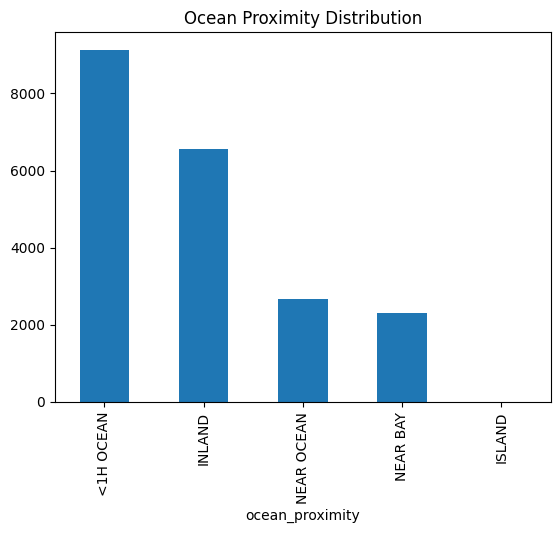

In [7]:
# 1. TERMİNAL KISMI: Sınıf Sayıları
# (Bana atman için: Hangi kategoriden kaç tane var?)
print("\n--- OCEAN PROXIMITY COUNTS ---")
print(housing["ocean_proximity"].value_counts())

# 2. GÖRSEL KISIM: Çubuk Grafik
# (Senin görmen için: Dengeli mi değil mi?)
housing["ocean_proximity"].value_counts().plot(kind='bar')
plt.title("Ocean Proximity Distribution")
plt.show()

In [8]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# 1. Geliri kategorilere ayıralım (Gruplama yapıyoruz ki eşit bölelim)
# Geliri 1.5'lik dilimlere bölüyoruz, 5 ve üzerini tek kategori (5) yapıyoruz.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# 2. Stratified Split (Tabakalı Ayırma) işlemi
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# 3. Bakalım oranlar korunmuş mu? (Kontrol)
print("Tüm Verideki Gelir Dağılımı Oranı:")
print(housing["income_cat"].value_counts() / len(housing))

print("\nTest Setindeki Gelir Dağılımı Oranı:")
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

# 4. Yardımcı 'income_cat' sütununu artık silebiliriz, işi bitti.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Tüm Verideki Gelir Dağılımı Oranı:
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

Test Setindeki Gelir Dağılımı Oranı:
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [9]:
# Fiyat sütununu atıp sadece özellikler (X)
housing = strat_train_set.drop("median_house_value", axis=1)

# Sadece fiyat sütunu (y)
housing_labels = strat_train_set["median_house_value"].copy()

In [10]:
from sklearn.impute import SimpleImputer

# 1. İmputer'ı oluştur (Strateji: Medyan)
imputer = SimpleImputer(strategy="median")

# 2. Sadece sayısal sütunları seç (Metin verisinin medyanı alınamaz!)
housing_num = housing.select_dtypes(include=[float, int]) # numpy import etmediysen float, int yazabilirsin veya np.number

# 3. Medyanları hesapla (fit)
imputer.fit(housing_num)

# Bakalım her sütun için medyan neymiş?
print("Hesaplanan Medyanlar:", imputer.statistics_)

# 4. Eksik yerleri doldur (transform)
X = imputer.transform(housing_num)

# Sonucu tekrar DataFrame'e çevir (Görmek için)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# Kontrol edelim, boşluk kaldı mı?
print("\nBoş veri kaldı mı?:", housing_tr.isnull().sum().max()) # 0 olmalı

Hesaplanan Medyanlar: [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]

Boş veri kaldı mı?: 0


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Sadece kategorik sütunu al
housing_cat = housing[["ocean_proximity"]]

# Encoder'ı oluştur
cat_encoder = OneHotEncoder()

# Dönüştür
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# Sonuç bir "Sparse Matrix" (Sıkıştırılmış matris) döner. İçini görmek için array'e çevirelim.
print(housing_cat_1hot.toarray()[:5])

# Kategorilerin isimleri neler?
print("Kategoriler:", cat_encoder.categories_)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]
Kategoriler: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Sütunların indeks numaraları (housing.info() çıktısındaki sıraya göre)
# 3: total_rooms, 4: total_bedrooms, 5: population, 6: households
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # Hyperparameter
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # Bir şey öğrenmesine gerek yok, sadece dönüştürecek
    
    def transform(self, X):
        # Hane başına oda
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        # Hane başına nüfus
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            # Yatak odası oranı
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # Tüm yeni özellikleri eskilere ekleyip döndür
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Küçük bir test:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Eklenen sütunlarla birlikte boyut ne oldu?
print(housing_extra_attribs.shape)

(16512, 11)


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 1. Sayısal Veriler İçin Pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),      # Eksikleri doldur
    ('attribs_adder', CombinedAttributesAdder()),       # Yeni özellikler ekle
    ('std_scaler', StandardScaler()),                   # Ölçeklendir (Scaling)
])

# 2. Tam Dönüşüm (Sayısal + Kategorik Birleşimi)
num_attribs = list(housing_num) # Sayısal sütun isimleri
cat_attribs = ["ocean_proximity"] # Kategorik sütun ismi

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),    # Sayısalları num_pipeline'dan geçir
    ("cat", OneHotEncoder(), cat_attribs), # Kategorikleri OneHot yap
])

# 3. VERİYİ HAZIRLA! (Fit & Transform)
housing_prepared = full_pipeline.fit_transform(housing)

# Sonuç neye benziyor?
print("İşlenmiş Verinin Boyutu:", housing_prepared.shape)
print("İlk satırın işlenmiş hali:\n", housing_prepared[0])

İşlenmiş Verinin Boyutu: (16512, 16)
İlk satırın işlenmiş hali:
 [-0.94135046  1.34743822  0.02756357  0.58477745  0.64037127  0.73260236
  0.55628602 -0.8936472   0.01739526  0.00622264 -0.12112176  0.
  1.          0.          0.          0.        ]


In [15]:
from sklearn.linear_model import LinearRegression

# 1. Modeli Kur
lin_reg = LinearRegression()

# 2. Modeli Eğit (Veriyi ve Hedefi veriyoruz)
lin_reg.fit(housing_prepared, housing_labels)

# --- Test Zamanı ---
# Eğitim setinden rastgele 5 satır alıp bakalım, ne tahmin edecek?
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

# Veriyi pipeline'dan geçirmeyi unutmuyoruz! (Çünkü ham veri modelin dilinden anlamaz)
some_data_prepared = full_pipeline.transform(some_data)

print("Tahminler:", lin_reg.predict(some_data_prepared))
print("Gerçekler:", list(some_labels))

from sklearn.metrics import mean_squared_error

# Tüm eğitim seti için tahmin yap
housing_predictions = lin_reg.predict(housing_prepared)

# Hatayı hesapla
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print("Lineer Regresyon Hatası (RMSE):", lin_rmse)

Tahminler: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Gerçekler: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]
Lineer Regresyon Hatası (RMSE): 68627.87390018745


In [16]:
from sklearn.tree import DecisionTreeRegressor

# 1. Modeli Kur
tree_reg = DecisionTreeRegressor(random_state=42)

# 2. Eğit
tree_reg.fit(housing_prepared, housing_labels)

# 3. Hatayı Ölç
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

print("Karar Ağacı Hatası (RMSE):", tree_rmse)

Karar Ağacı Hatası (RMSE): 0.0


In [17]:
from sklearn.model_selection import cross_val_score

# Karar Ağacı için Çapraz Doğrulama
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

# Scikit-Learn "Utility" (fayda) fonksiyonu kullanır (büyük sayı iyidir),
# ama MSE bir "Cost" (maliyet) fonksiyonudur (küçük sayı iyidir).
# O yüzden negatifini alıp karekökünü hesaplıyoruz.
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean (Ortalama Hata):", scores.mean())
    print("Standard Deviation (Sapma):", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean (Ortalama Hata): 71629.89009727491
Standard Deviation (Sapma): 2914.035468468928


In [18]:
from sklearn.ensemble import RandomForestRegressor

# 1. Modeli Kur (100 tane ağaç kullanalım)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Eğit
forest_reg.fit(housing_prepared, housing_labels)

# 3. Eğitim Seti Hatasını Ölç
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Eğitim Hatası:", forest_rmse)

# 4. Çapraz Doğrulama ile Gerçek Performansı Ölç (Bu işlem biraz sürebilir!)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("\n--- Random Forest Cross-Validation ---")
display_scores(forest_rmse_scores)

Random Forest Eğitim Hatası: 18650.698705770003

--- Random Forest Cross-Validation ---
Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean (Ortalama Hata): 50435.58092066179
Standard Deviation (Sapma): 2203.3381412764606


In [19]:
from sklearn.model_selection import GridSearchCV

# Denenecek parametre kombinasyonları
param_grid = [
    # 1. Kombinasyon: 3x4 = 12 model eğitilecek
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # 2. Kombinasyon: Bootstrap kapatılarak 2x3 = 6 model daha
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# Grid Search'ü başlat (cv=5 yani her model 5 kez test edilecek)
# Toplam: (12 + 6) * 5 = 90 tur eğitim yapılacak!
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [20]:
# En iyi parametreler hangileri?
print("En İyi Parametreler:", grid_search.best_params_)

# En iyi modelin skorunu görelim (RMSE)
rmse = np.sqrt(-grid_search.best_score_)
print("Grid Search Sonrası En İyi RMSE:", rmse)

# En iyi tahminciyi (modeli) alalım
final_model = grid_search.best_estimator_

En İyi Parametreler: {'max_features': 8, 'n_estimators': 30}
Grid Search Sonrası En İyi RMSE: 49898.98913455217


In [21]:
# En iyi modelin öğrendiği özelliklerin önem dereceleri
feature_importances = grid_search.best_estimator_.feature_importances_

# Özellik isimlerini hazırlayalım
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# Önem derecesine göre sıralayıp yazdıralım
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.3790092248170967), 'median_income'),
 (np.float64(0.16570630316895876), 'INLAND'),
 (np.float64(0.10703132208204354), 'pop_per_hhold'),
 (np.float64(0.06965425227942929), 'longitude'),
 (np.float64(0.0604213840080722), 'latitude'),
 (np.float64(0.05477891501828372), 'rooms_per_hhold'),
 (np.float64(0.048203121338269206), 'bedrooms_per_room'),
 (np.float64(0.04218822024391753), 'housing_median_age'),
 (np.float64(0.015849114744428634), 'population'),
 (np.float64(0.015554529490469328), 'total_bedrooms'),
 (np.float64(0.01524505568840977), 'total_rooms'),
 (np.float64(0.014934655161887774), 'households'),
 (np.float64(0.006792660074259966), '<1H OCEAN'),
 (np.float64(0.0030281610628962747), 'NEAR OCEAN'),
 (np.float64(0.0015247327555504937), 'NEAR BAY'),
 (np.float64(7.834806602687504e-05), 'ISLAND')]

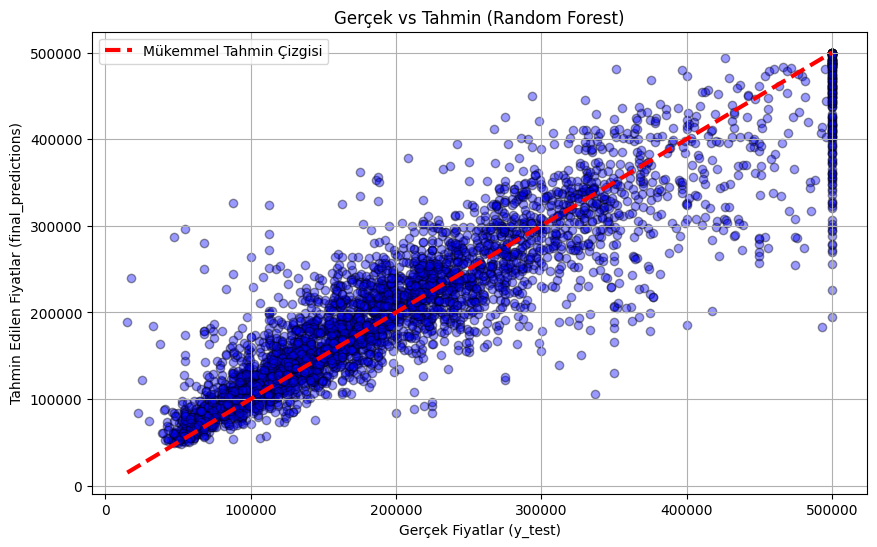

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Test verisini ve Hedefleri (y_test) Tekrar Tanımlayalım
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# 2. Modeli (GridSearch'ten gelen en iyisini) Alalım
final_model = grid_search.best_estimator_

# 3. Veriyi Pipeline'dan Geçirelim ve Tahmin Yapalım
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

# 4. Grafiği Çizelim
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_predictions, alpha=0.4, c="blue", edgecolors="k")

# İdeal durumu gösteren kırmızı kesikli çizgi (Gerçek = Tahmin)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3, label="Mükemmel Tahmin Çizgisi")

plt.xlabel("Gerçek Fiyatlar (y_test)")
plt.ylabel("Tahmin Edilen Fiyatlar (final_predictions)")
plt.title("Gerçek vs Tahmin (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# 1. R2 SKORU (Veriyi Açıklama Gücü)
# 1.0 = Mükemmel, 0.0 = Berbat
r2_val = r2_score(y_test, final_predictions)

# 2. MAPE (Ortalama Yüzde Hata)
# Örneğin 0.20 çıkarsa, %20 hata yapıyoruz demektir.
mape_val = mean_absolute_percentage_error(y_test, final_predictions)

print(f"Modelin Başarısı (R2 Skoru): %{r2_val * 100:.2f}")
print("--------------------------------------------------")
print(f"Ortalama Hata Payımız (MAPE): %{mape_val * 100:.2f}")
print(f"Yani kabaca 'Doğruluk' Oranımız: %{(1 - mape_val) * 100:.2f}")

Modelin Başarısı (R2 Skoru): %82.42
--------------------------------------------------
Ortalama Hata Payımız (MAPE): %18.23
Yani kabaca 'Doğruluk' Oranımız: %81.77
